<a href="https://colab.research.google.com/github/ShweataNHegde/literacy-data/blob/main/literacy_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas mapclassify
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
literacy_rate_women = pd.read_csv('https://raw.githubusercontent.com/ShweataNHegde/literacy-data/refs/heads/main/nfhs-2022/literacy_rate_women.csv')
employment_percentage_women = pd.read_csv('https://raw.githubusercontent.com/ShweataNHegde/literacy-data/refs/heads/main/nfhs-2022/employment_women.csv')
hiv_awareness_women = pd.read_csv('https://raw.githubusercontent.com/ShweataNHegde/literacy-data/refs/heads/main/nfhs-2022/HIV_Awareness_Women.csv')
media_exposure_women = pd.read_csv('https://raw.githubusercontent.com/ShweataNHegde/literacy-data/refs/heads/main/nfhs-2022/media_exposure_women.csv')
mentstural_protection = pd.read_csv('https://raw.githubusercontent.com/ShweataNHegde/literacy-data/refs/heads/main/nfhs-2022/women_menstruation_hygiene.csv')

In [ ]:
for df in [literacy_rate_women, employment_percentage_women, hiv_awareness_women, media_exposure_women, mentstural_protection]:
    df["State/UT"] = df["State/UT"].str.strip().str.lower()  # Clean names

merged_women = literacy_rate_women.merge(employment_percentage_women, on="State/UT")
merged_women = merged_women.merge(hiv_awareness_women, on="State/UT")
merged_women = merged_women.merge(media_exposure_women, on="State/UT")
merged_women = merged_women.merge(mentstural_protection, on="State/UT" )

merged_women.to_csv("merged_data_women.csv", index=False)
merged_women

,State/UT,No Schooling,<5 yrs,5-7 yrs,8-9 yrs,10-11 yrs,12+ yrs,Total_x,Literate (%),Currently employed,...,Women_Used_Internet,Cloth,Locally Prepared Napkins,Sanitary Napkins,Tampons,Menstrual Cup,Other,Nothing,Number of Women,Percentage Using Hygienic Method
0,india,22.6,5.2,13.4,17.8,15.2,25.9,100.0,71.5,25.2,...,33.3,49.6,15.0,64.4,1.7,0.3,0.2,0.2,241112,77.6
1,chandigarh,12.4,1.5,11.5,15.0,19.2,40.4,100.0,78.7,20.5,...,75.2,10.7,23.7,72.8,0.0,0.5,0.0,0.0,176,94.5
2,delhi,13.1,2.7,9.6,14.9,16.3,43.4,100.0,83.7,22.5,...,63.8,15.9,6.7,94.7,0.1,0.1,0.0,0.1,3540,97.1
3,haryana,15.9,2.9,14.4,17.2,16.4,33.1,100.0,79.7,18.9,...,48.4,22.1,15.2,80.8,0.8,0.3,0.1,0.1,4484,93.5
4,himachal pradesh,7.4,2.3,11.9,12.6,21.2,44.7,100.0,90.7,23.9,...,49.7,31.1,6.8,86.4,0.1,0.2,0.1,0.0,1037,92.0
5,jammu & kashmir,21.3,1.2,6.6,19.7,18.3,33.0,100.0,74.3,21.9,...,43.3,58.4,23.1,50.5,3.3,1.3,0.0,0.3,2116,74.5
6,ladakh,22.1,1.2,7.7,18.9,18.2,31.8,100.0,74.6,27.2,...,56.4,58.1,19.2,56.4,6.1,1.2,0.0,0.0,35,79.1
7,punjab,15.3,2.0,12.3,14.4,19.9,36.1,100.0,79.4,21.7,...,54.8,27.4,26.8,71.2,0.6,0.3,0.0,0.0,4352,93.3
8,rajasthan,31.3,3.6,14.7,16.9,11.8,21.7,100.0,64.7,22.0,...,36.9,43.6,10.9,76.6,0.7,0.0,0.0,0.3,16617,84.3
9,uttarakhand,16.9,2.5,11.3,18.9,13.7,36.7,100.0,79.8,22.0,...,45.1,38.9,6.6,85.9,0.1,0.1,0.0,0.0,2078,91.5


In [ ]:
merged_women['Difference_Employed'] = merged_women['Literate (%)'] - merged_women['Currently employed']
merged_women['Difference_HIV_Heard'] = merged_women['Literate (%)'] - merged_women['Heard of HIV/AIDS (%)']
merged_women['Difference_HIV_Condom'] = merged_women['Literate (%)'] - merged_women['Know Prevention via Condoms (%)']
merged_women['Difference_Women_Reads_Newspaper'] =  merged_women['Literate (%)'] - merged_women['Women_Reads_Newspaper']
merged_women['Difference_Comprehensive_Knowledge'] = merged_women['Literate (%)'] - merged_women['Comprehensive Knowledge (%)']
merged_women['Difference_Watching_TV'] = merged_women['Literate (%)'] - merged_women['Women_Watches_TV']
merged_women['Difference_Menstruation_Hygiene'] = merged_women['Literate (%)'] - merged_women['Percentage Using Hygienic Method']
merged_women['Difference_Used_Internet'] = merged_women['Literate (%)'] - merged_women['Women_Used_Internet']

In [ ]:
merged_women['all_the_difference'] = merged_women['Difference_Employed']+ merged_women['Difference_HIV_Heard']+ merged_women['Difference_HIV_Condom']+ merged_women['Difference_Women_Reads_Newspaper']+ merged_women['Difference_Comprehensive_Knowledge']+ merged_women['Difference_Watching_TV']+ merged_women['Difference_Menstruation_Hygiene']+ merged_women['Difference_Used_Internet']
print(merged_women[['State/UT','Literate (%)', 'all_the_difference' ]])


                                State/UT  Literate (%)  all_the_difference
0                                  india          71.5               190.8
1                             chandigarh          78.7               158.5
2                                  delhi          83.7               178.9
3                                haryana          79.7               222.3
4                       himachal pradesh          90.7               269.9
5                        jammu & kashmir          74.3               228.6
6                                 ladakh          74.6               168.4
7                                 punjab          79.4               217.5
8                              rajasthan          64.7               123.4
9                            uttarakhand          79.8               216.3
10                          chhattisgarh          72.5               192.9
11                        madhya pradesh          65.4               179.0
12                       

In [ ]:
min_difference_row = merged_women.loc[merged_women['all_the_difference'].idxmin()]
max_difference_row = merged_women.loc[merged_women['all_the_difference'].idxmax()]

print("State with the least difference:")
print(f"State/UT: {min_difference_row['State/UT']}")
print(f"All the Difference: {min_difference_row['all_the_difference']}")

print("\nState with the most difference:")
print(f"State/UT: {max_difference_row['State/UT']}")
print(f"Total Difference: {max_difference_row['all_the_difference']}")

State with the least difference:
State/UT: telangana
All the Difference: 75.19999999999996

State with the most difference:
State/UT: meghalaya
All the Difference: 340.69999999999993


In [ ]:
# Select states where 'Literate (%)' is greater than 90
literate_high = merged_women[merged_women['Literate (%)'] > 90].copy()
# Find the row with the minimum 'all_the_difference' in the filtered data
min_difference_high_literacy_row = literate_high.loc[literate_high['all_the_difference'].idxmin()]
# Find the row with the maximum 'all_the_difference' in the filtered data
max_difference_high_literacy_row = literate_high.loc[literate_high['all_the_difference'].idxmax()]
print("State with the least difference among states with > 90% literacy:")
print(f"State/UT: {min_difference_high_literacy_row['State/UT']}")
print(f"All the Difference: {min_difference_high_literacy_row['all_the_difference']}")
print("\nState with the most difference among states with > 90% literacy:")
print(f"State/UT: {max_difference_high_literacy_row['State/UT']}")
print(f"Total Difference: {max_difference_high_literacy_row['all_the_difference']}")

State with the least difference among states with > 90% literacy:
State/UT: goa
All the Difference: 165.80000000000004

State with the most difference among states with > 90% literacy:
State/UT: lakshadweep
Total Difference: 304.6


<ipython-input-53-2432446228>:40: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



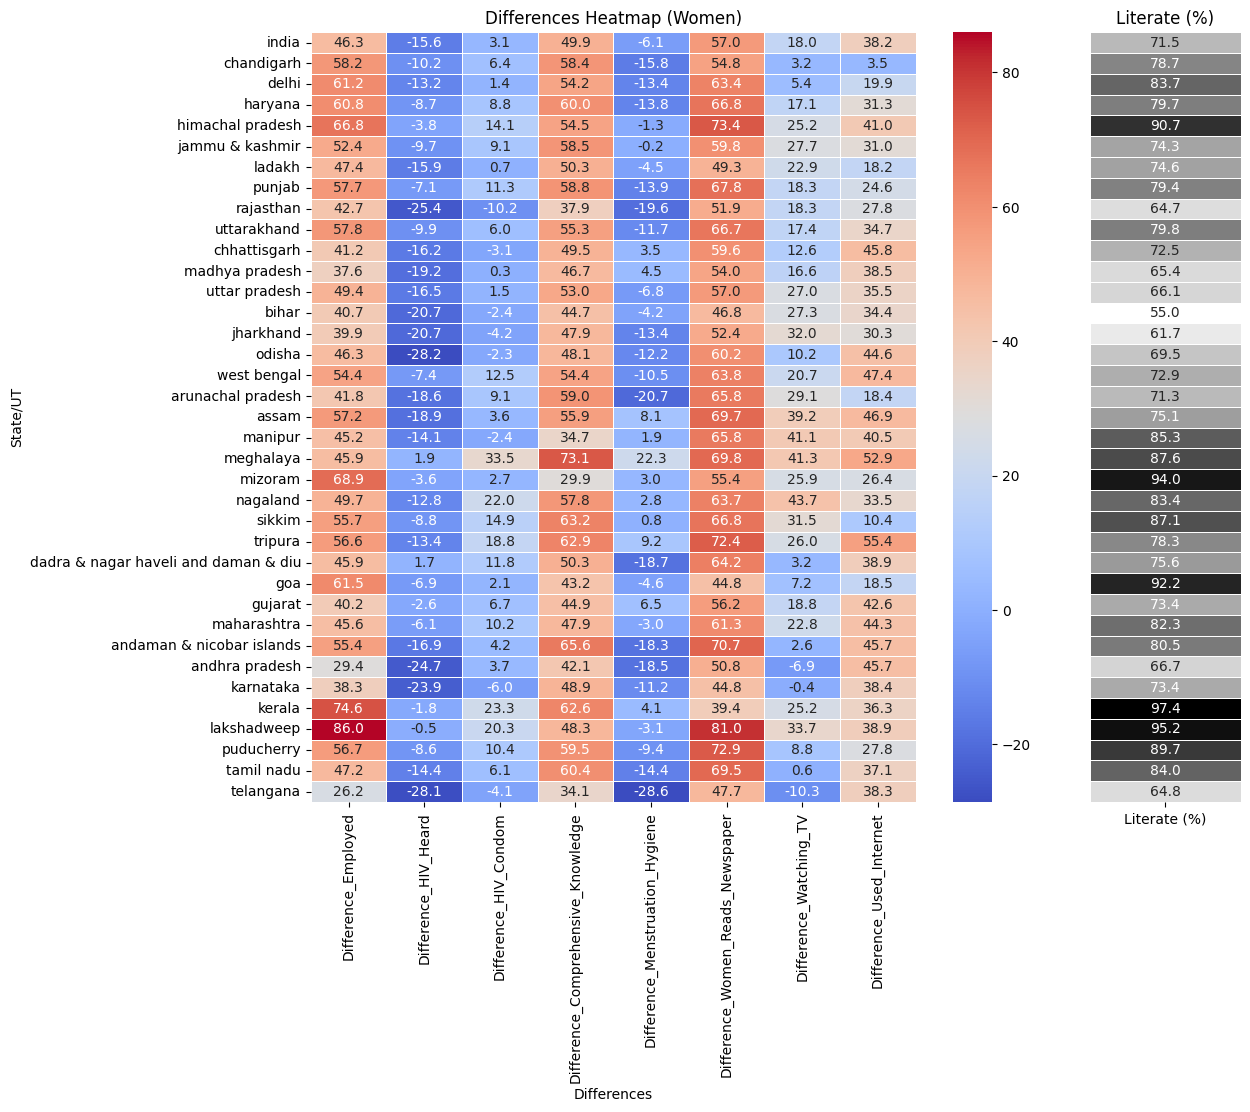

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

heatmap_data = merged_women[['State/UT',
                             'Difference_Employed',
                             'Difference_HIV_Heard',
                             'Difference_HIV_Condom',
                             'Difference_Comprehensive_Knowledge',
                             'Difference_Menstruation_Hygiene',
                             'Difference_Women_Reads_Newspaper',
                             'Difference_Watching_TV',
                             'Difference_Used_Internet']].set_index('State/UT')

# Get the literacy percentage column
literacy_col = merged_women.set_index('State/UT')[['Literate (%)']]

# Set up the plot with two columns: heatmap and literacy
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1], wspace=0.05)


# Main heatmap
ax0 = plt.subplot(gs[0])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, ax=ax0, cbar=True)
ax0.set_title('Differences Heatmap (Women)')
ax0.set_xlabel('Differences')
ax0.set_ylabel('State/UT')

# Literacy percentage (no color, just text)
ax1 = plt.subplot(gs[1], sharey=ax0)
sns.heatmap(literacy_col, annot=True, fmt=".1f", cbar=False, cmap='Greys', linewidths=0.5, ax=ax1)
ax1.set_title('Literate (%)')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(left=False)
ax1.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig('difference_women.png')
plt.show()

In [ ]:
Education Level,Using condoms,Limiting sexual intercourse to one uninfected partner,Using condoms and limiting sexual intercourse,Percent who say HIV/AIDS can be got from blood transfusion,Percent who say HIV/AIDS can be got from injecting drugs,Number of women
No schooling,55.0,57.9,47.3,62.1,58.2,9982
<5 years complete,59.6,61.8,51.6,65.9,61.6,5842
5-7 years complete,64.3,66.0,55.8,70.1,66.6,12082
8-9 years complete,66.9,68.5,58.3,72.1,67.6,18472
10-11 years complete,73.6,75.3,65.3,80.2,75.8,16735
12 or more years complete,82.0,84.3,74.9,86.9,81.6,27751
